# Exploration of Reddit posts collected

In [2]:
import pickle as pkl
import os
import datetime
import matplotlib.pyplot as plt

In [3]:
directory = '.../DATAFEST_2022/submissions/'
sub_obj_list = []
count = 0
for file in os.listdir (directory):
    if file.endswith('.pkl'):
        with open (directory + file, 'rb') as f:
            sub_obj_list.append(pickle.load(f))
            count += 1   
print ('File count:', count)

FileNotFoundError: [Errno 2] No such file or directory: '.../DATAFEST_2022/submissions/'

# Count of posts by Subreddit

In [1]:
import seaborn as sns
subreddit_count = {}

for submission in sub_obj_list:
    if submission.subreddit.display_name not in subreddit_count:
        subreddit_count[submission.subreddit.display_name] = 1
    else:
        subreddit_count[submission.subreddit.display_name] += 1

subreddit_count = {k: v for k, v in sorted(subreddit_count.items(), key=lambda item: item[1], reverse=True) if v>1}

# for k,v in subreddit_count.items():
#     print (k,v)

subreddit_list = list(subreddit_count.keys())
subreddit_count = list(subreddit_count.values())

## new code for figure 
sns.set(rc={'figure.figsize': (20,10),'font.size':20}) 
patches=plt.bar(subreddit_list, subreddit_count)

plt.bar_label(patches, fontsize = 15)
plt.grid(axis = 'x')
plt.xticks(subreddit_list)
plt.title ('Number of Submissions by Subreddits', fontsize = 'large')
plt.xlabel("SubReddits", fontsize = "medium", labelpad=20)
plt.ylabel("No. of Submissions", fontsize = "medium")


#plt.savefig('by_subreddits.png')
plt.show()

NameError: name 'sub_obj_list' is not defined

# Count of Posts by year

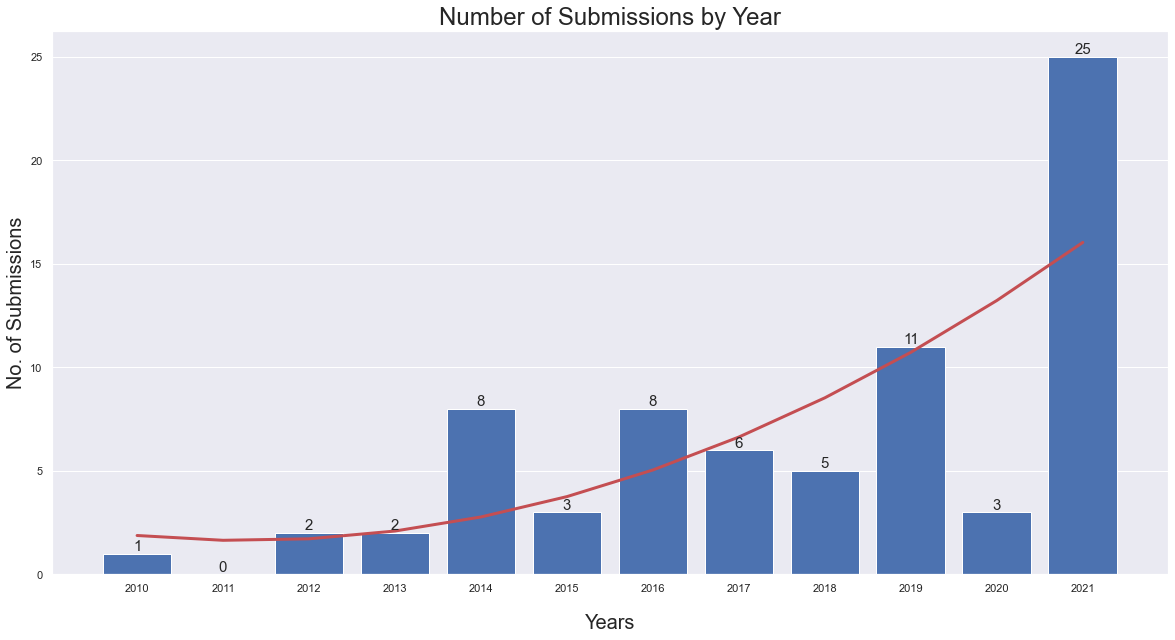

In [109]:
sub_year_count = {}

for submission in sub_obj_list:
    sub_year = datetime.datetime.fromtimestamp(submission.created_utc).year

    if sub_year not in sub_year_count:
        sub_year_count[sub_year] = 1
    else:
        sub_year_count[sub_year] += 1

sub_years = range(min(sub_year_count), max(sub_year_count)+1, 1)

sub_counts = []
for year in sub_years:
    if year in sub_year_count:
        sub_counts.append(sub_year_count[year])
    else:
        sub_counts.append(0)

## new code for figure 
sns.set(rc={'figure.figsize': (20,10),'font.size':20}) 
patches=plt.bar(sub_years, sub_counts)

plt.bar_label(patches, fontsize = 15)
plt.grid(axis = 'x')
plt.xticks(sub_years)
plt.title ('Number of Submissions by Year', fontsize = 'large')
plt.xlabel("Years", fontsize = "medium", labelpad=20)
plt.ylabel("No. of Submissions", fontsize = "medium")

# degree of freedom =2
z = np.polyfit(sub_years, sub_counts,2)
p = np.poly1d(z)
plt.plot(x,p(x), color = 'r', lw = 3)

#plt.plot (sub_years, sub_counts,'-o' ,color= 'r', linewidth = 2)


#plt.savefig('bySubmissions.png')
plt.show()

# Count of Comments by Year

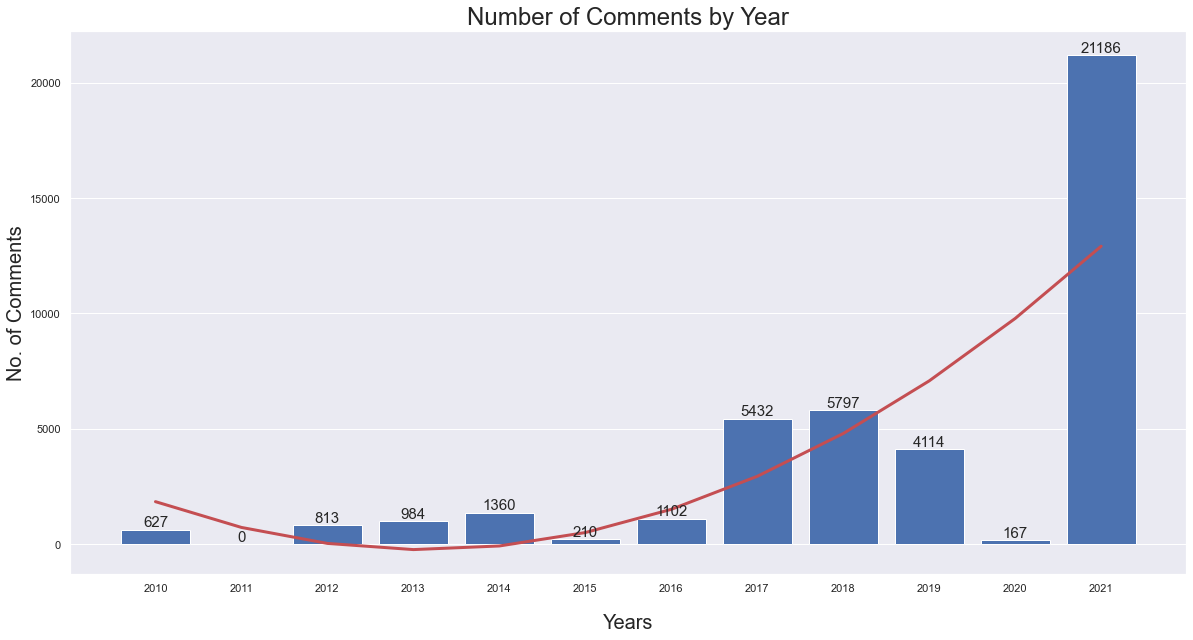

In [110]:
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.express as px

com_year_count = {}

for submission in sub_obj_list:
     for comment in submission.comments.list():
        com_year = datetime.datetime.fromtimestamp(comment.created_utc).year
        if com_year not in com_year_count:
            com_year_count[com_year] = 1
        else:
            com_year_count[com_year] += 1
            
com_years = range(min(com_year_count), max(com_year_count)+1)

com_counts = []
for year in com_years:
    if year in com_year_count:
        com_counts.append(com_year_count[year])
    else:
        com_counts.append(0)
    
    
## new code for figure 
sns.set(rc={'figure.figsize': (20,10),'font.size':20}) 
patches=plt.bar(com_years, com_counts)

plt.bar_label(patches, fontsize = 15)
plt.grid(axis = 'x')
plt.xticks(com_years)
plt.title ('Number of Comments by Year', fontsize = 'large')
plt.xlabel("Years", fontsize = "medium", labelpad=20)
plt.ylabel("No. of Comments", fontsize = "medium")

# degree of freedom =2
z = np.polyfit(com_years, com_counts,2)
p = np.poly1d(z)
plt.plot(x,p(x), color = 'r', lw = 3)

#plt.plot (com_years, com_counts,'-o' ,color= 'r', linewidth = 2)


#plt.savefig('byComments.png')
plt.show()